# FDS PROJECT: HOME CREDIT DEFAULT RISK
####  https://www.kaggle.com/c/home-credit-default-risk

### TEAM:
* <b> Alessandro Taglieri: </b> <i> Matricola: </i> 1890945, <i>e-mail:</i> taglieri.1890945@studenti.uniroma1.it, <i>kaggle username:</i> AlessandroTaglieri

# Import libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# File system management
import os

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import itertools

#Suppress warnings
import warnings 
warnings.filterwarnings('ignore')

# sklearn preprocessing
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, MinMaxScaler
# Imputer
from sklearn.impute import SimpleImputer

# Models
from sklearn.model_selection import train_test_split
import lightgbm as lgb

# Load the data from csv file into a pandas dataframe.

In [2]:
train_data = pd.read_csv('home-credit-default-risk/application_train.csv')
test_data =  pd.read_csv('home-credit-default-risk/application_test.csv')

## Description

In [3]:
(train_data.shape, test_data.shape)

((307511, 122), (48744, 121))

In [4]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
train_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
train_data.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [7]:
train_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

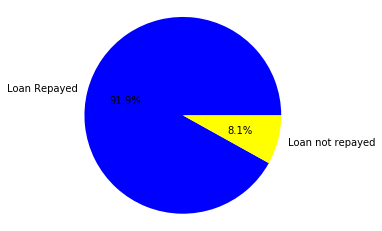

In [8]:
# Data to plot
graph_labels = 'Loan Repayed', 'Loan not repayed'
sizes = [train_data['TARGET'].value_counts()[0],train_data['TARGET'].value_counts()[1]]
colors_graph = ['blue', 'yellow']

# Plot the pie chart
plt.pie(sizes, labels=graph_labels, colors=colors_graph,
        autopct='%1.1f%%')
plt.axis('equal')
plt.show()

This following function tests if there are any null values

## Check missing values

In [9]:

def search_missing_values(df):
    #Sum of total missing values
    missing_value = df.isnull().sum() 
    
    
    percentage_values = 100 * missing_value / len(df)
    
    #Visualize the results
    result = pd.concat([missing_value, percentage_values], axis=1) #concatinate the values together
    
    #Name the columns
    columns = result.rename(columns = {0 : 'Missing values', 
                                      1 : 'Percentage of total values'})
    #Sort the table
    columns = columns[columns.iloc[:,1] != 0].sort_values(
        'Percentage of total values', ascending=False).round(1)
    
    #Print information
    print("Number of columns: " + str(df.shape[1]))
    print("Number of columns with null values " + str(columns.shape[0]))
    
    return columns

In [10]:
result_missing_values = search_missing_values(train_data)
result_missing_values.head(10)

Number of columns: 122
Number of columns with null values 67


,Missing values,Percentage of total values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


With this following function and next step, I take all column names that contains missing values (i.e. null values)

In [11]:
def search_missing_values2(df):
    missing = df.isnull().sum()/df.shape[0]
    percentage_missing = missing*100
    return percentage_missing.sort_values(ascending=False).round(1)

In [12]:
result_missing_values = search_missing_values2(train_data)

In [13]:
result_missing_values = pd.DataFrame({'columns': result_missing_values.index, 'missing percent': result_missing_values.values})
drop_columns = result_missing_values[result_missing_values['missing percent'] >= 40]['columns'].tolist()
drop_columns

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_AVG',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_MODE',
 'FLOORSMIN_AVG',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MODE',
 'OWN_CAR_AGE',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'LANDAREA_MEDI',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MODE',
 'ELEVATORS_MODE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MODE',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'ENTRANCES_AVG',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_MODE',
 'LIVINGAREA_AVG',
 'HOUSETYPE_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BEGINEXPLUATATION

Text(0.5, 0, 'COLUMNS')

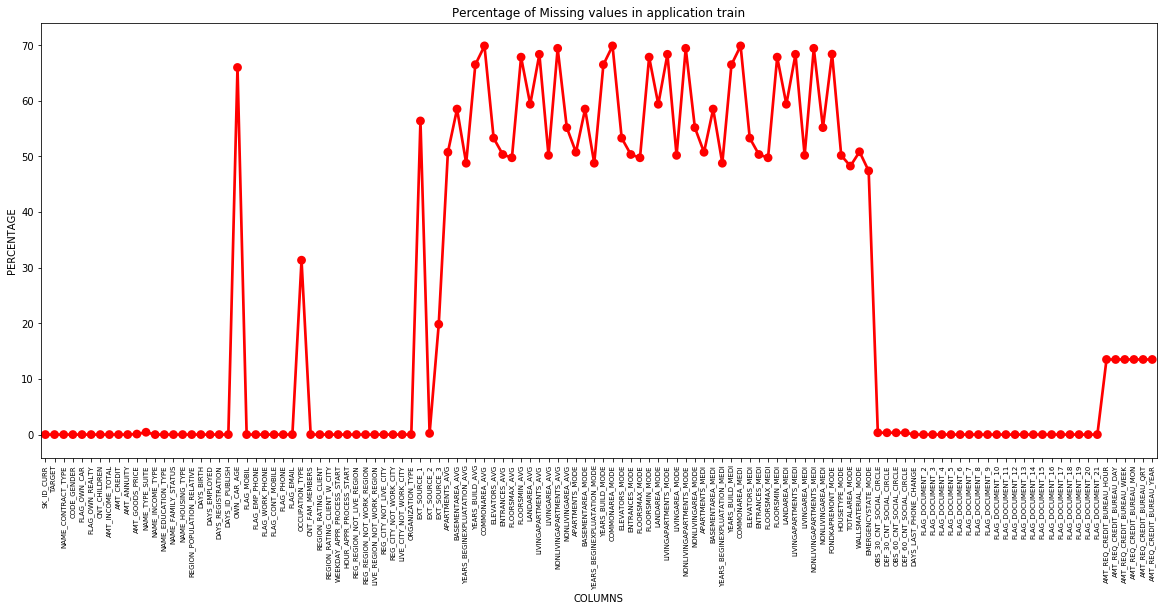

In [14]:
#Visualize the missing values

fig = plt.figure(figsize=(20,8))
miss_train = pd.DataFrame((train_data.isnull().sum())*100/train_data.shape[0]).reset_index()
miss_test = pd.DataFrame((test_data.isnull().sum())*100/test_data.shape[0]).reset_index()
ax = sns.pointplot("index",0, data=miss_train, color='r')
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application train")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")



Text(0.5, 0, 'COLUMNS')

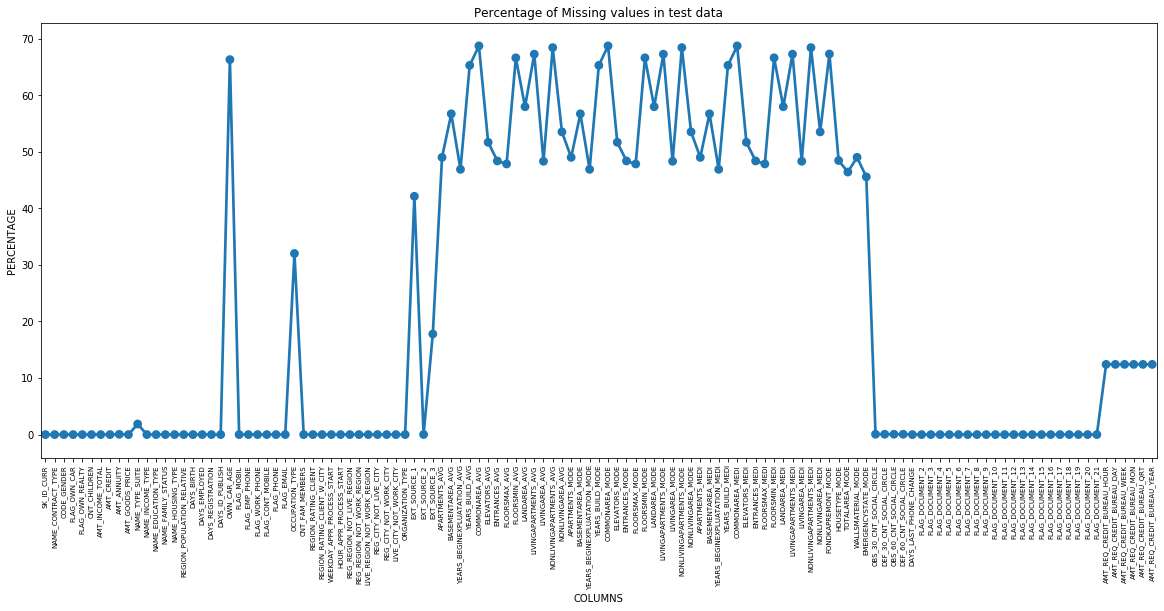

In [15]:
fig = plt.figure(figsize=(20,8))
ax = sns.pointplot("index",0, data=miss_test)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in test data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")


Lets look at the data compared to defaulters and repayers income, credit, goods price and annuity. We can see which of the columns has x% missing values, in both train and test data.

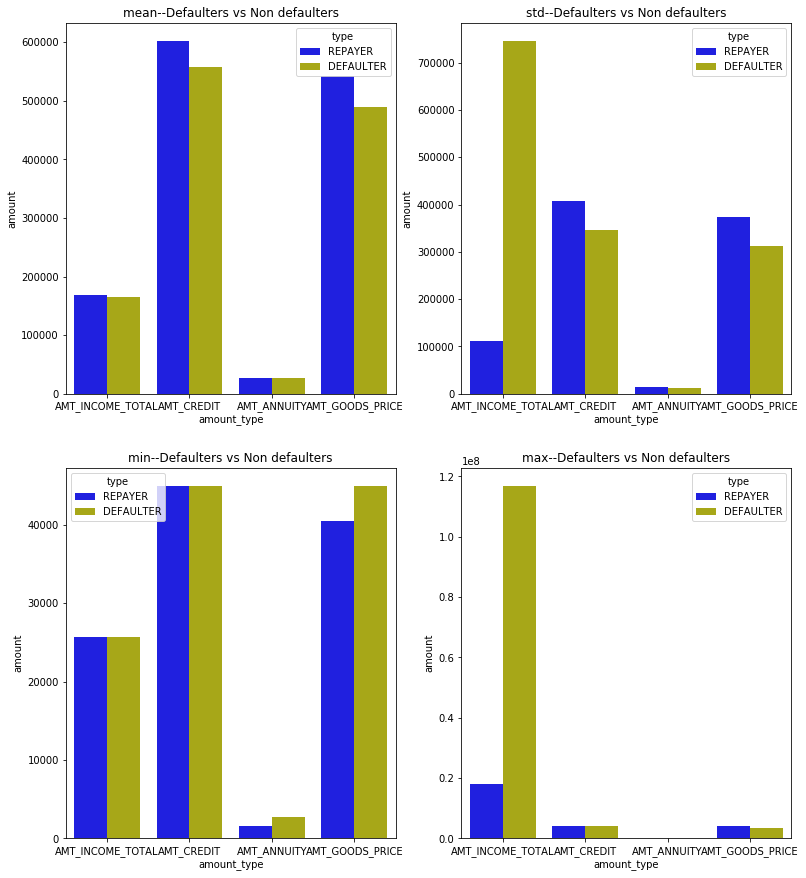

In [16]:
columns = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']

df = train_data.groupby("TARGET")[columns].describe().transpose().reset_index()
df = df[df["level_1"].isin([ 'mean', 'std', 'min', 'max'])] 
df_x = df[["level_0","level_1",0]]
df_y = df[["level_0","level_1",1]]
df_x = df_x.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 0:"amount"})
df_x["type"] = "REPAYER"
df_y = df_y.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 1:"amount"})
df_y["type"] = "DEFAULTER"
df2 = pd.concat([df_x,df_y],axis = 0)

stat = df2["statistic"].unique().tolist()
length = len(stat)

plt.figure(figsize=(13,15))

#Itertools.zip_longest make an iterator that aggregates elements from each of the iterables. 
#If the iterables are of uneven length, missing values are filled-in with

for i,j in itertools.zip_longest(stat,range(length)):
    plt.subplot(2,2,j+1)
    fig = sns.barplot(df2[df2["statistic"] == i]["amount_type"],df2[df2["statistic"] == i]["amount"],
                hue=df2[df2["statistic"] == i]["type"],palette=["b","y"])
    plt.title(i + "--Defaulters vs Non defaulters")
    
  

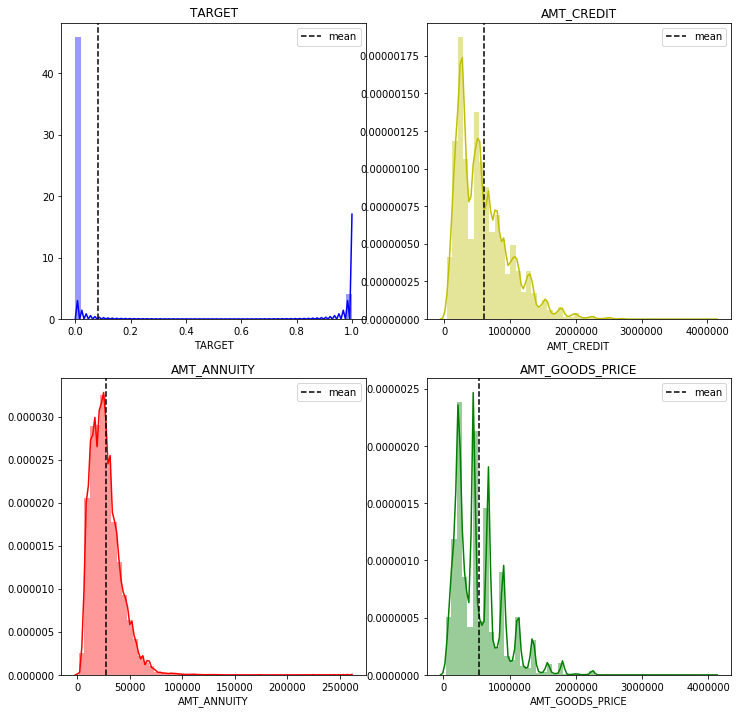

In [17]:
columns = [ 'TARGET', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']
length = len(columns)
cs = ["b","y","r","g"]

ax = plt.figure(figsize=(12,12))

for i,j,k in itertools.zip_longest(columns,range(length),cs):
    plt.subplot(2,2,j+1)
    sns.distplot(train_data[train_data[i].notnull()][i],color=k)
    plt.axvline(train_data[i].mean(),label = "mean",linestyle="dashed",color="k")
    plt.legend(loc="best")
    plt.title(i)
    plt.subplots_adjust(hspace = .2)

##### Correlation between attributes:

We use the missing_values feature to measure correlation with target and see which feature we can drop

In [18]:
correlation_matrix = train_data.corr()['TARGET'].sort_values(ascending=False)

print('Most Positive Correlations - First 15:\n', correlation_matrix.head(15))
print('\nMost Negative Correlations- First 15:\n', correlation_matrix.tail(15))

Most Positive Correlations - First 15:
 TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
Name: TARGET, dtype: float64

Most Negative Correlations- First 15:
 LIVINGAREA_MEDI              -0.032739
LIVINGAREA_AVG               -0.032997
FLOORSMIN_MEDI               -0.033394
FLOORSMIN_AVG                -0.033614
ELEVATORS_MEDI               -0.033863
ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE   

We can see the correlations between days_birth and target is the highest positive correlation. But DAYS_BIRTH has a negative value, meaning when the clients gets older, they are less likely to default.

In [19]:
train_data['DAYS_BIRTH'] = abs(train_data['DAYS_BIRTH'])
train_data['DAYS_BIRTH'].corr(train_data['TARGET'])

-0.07823930830982712

Now that we have taken the absolute value of days birth, we have acquired a negative correlation between target and days birth. This means that the older the client is, the more likely the client is to pay the loan.

###  Distribution of Clients Age

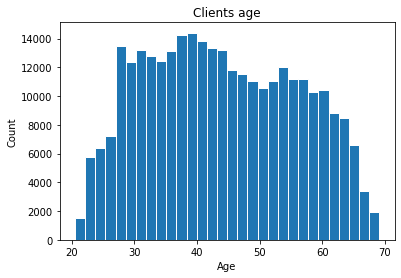

In [20]:
plt.hist(train_data['DAYS_BIRTH'] / 365, edgecolor='white', bins= 30)
plt.title('Clients age');
plt.xlabel('Age');
plt.ylabel('Count');

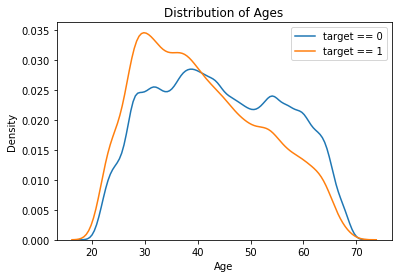

In [21]:
#Kernel density plot
#display all days birth with target = 0
sns.kdeplot(train_data.loc[train_data['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')
#display all days birth with target = 1
sns.kdeplot(train_data.loc[train_data['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

plt.xlabel('Age');
plt.ylabel('Density');
plt.title('Distribution of Ages');

We can see that clients under 40 has more problems paying their loans, while clients over 40 is more evenly distributed.

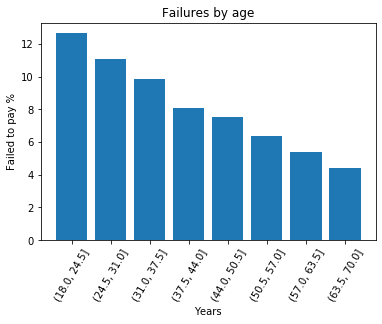

In [22]:
#Separate the data
age = train_data[['TARGET', 'DAYS_BIRTH']]
age['YEARS_BIRTH'] = age['DAYS_BIRTH'] / 365
#store in 7 years span
age['YEARS_SPAN'] = pd.cut(age['YEARS_BIRTH'], bins = np.linspace(18, 70, num = 9))

#group the data
age_group = age.groupby('YEARS_SPAN').mean()

#barchart
plt.bar(age_group.index.astype(str), 100 * age_group['TARGET'])

#plot 
plt.xticks(rotation = 60);
plt.xlabel('Years');
plt.ylabel('Failed to pay %');
plt.title('Failures by age');

This shows that when there is younger people, the possibility of not repaying their loans is higher


In [23]:
external_data = train_data[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = external_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


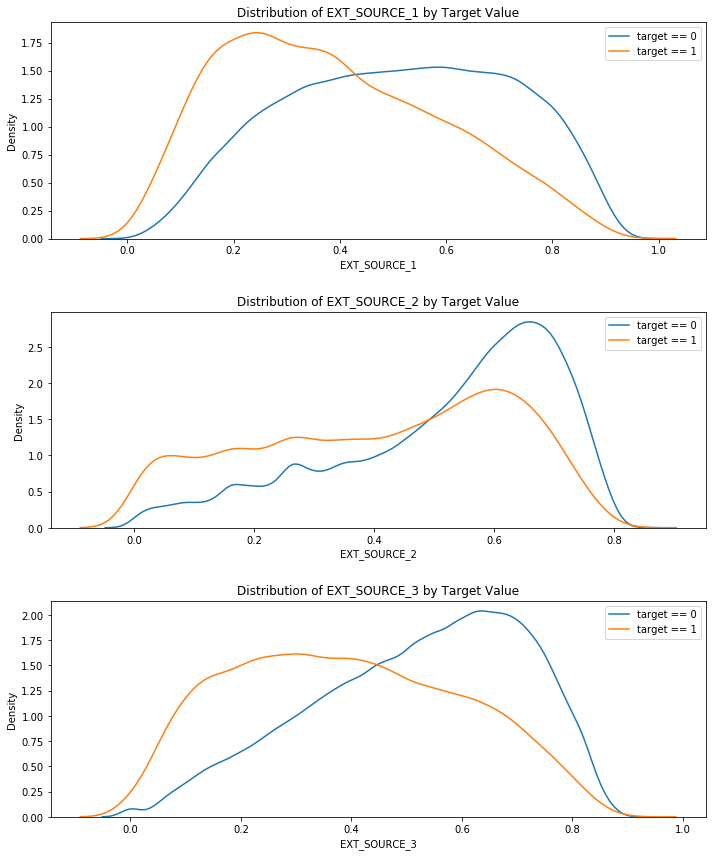

In [24]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(train_data.loc[train_data['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(train_data.loc[train_data['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

Found already plotted external sources 1-3 and can see the correlation between this and failure to pay.

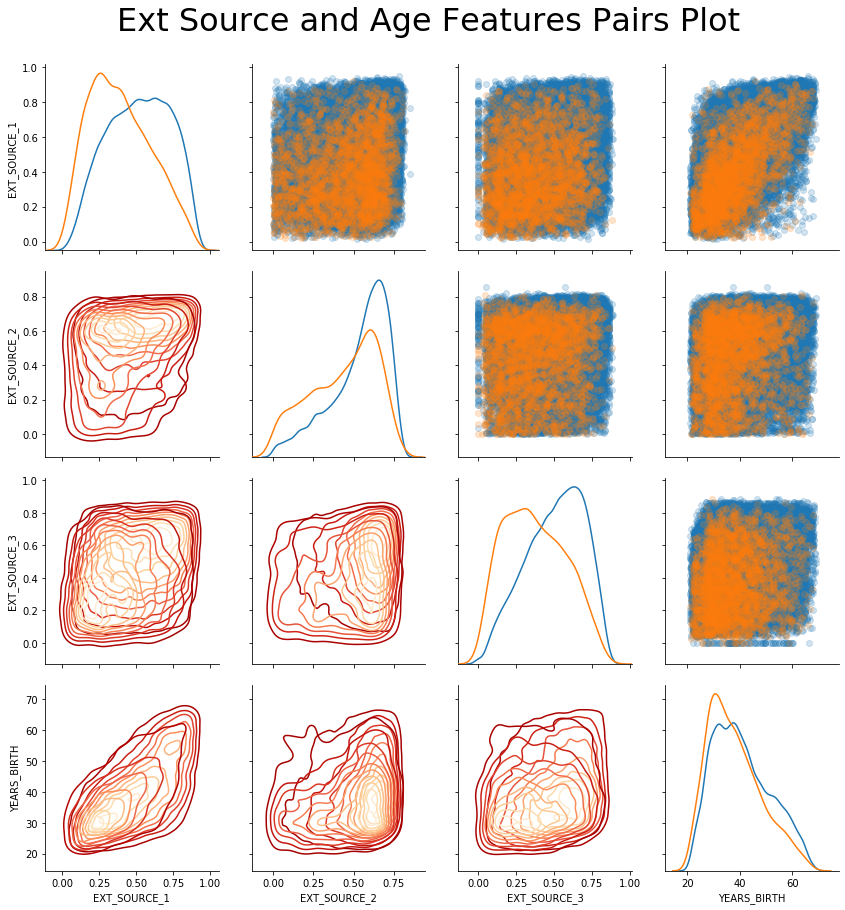

In [25]:
# Copy the data for plotting
data = external_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
data['YEARS_BIRTH'] = age['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
data = data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = data, height = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

# Preparing data:



### Drop missing values

We saw that the external source 1 had high correlation with target, so we put it back in train and test data later, when we need to use

In [26]:
ext1train_data = train_data['EXT_SOURCE_1']
ext1test_data = test_data['EXT_SOURCE_1']

In [27]:
train_data = train_data.drop(drop_columns, axis=1)
test_data = test_data.drop(drop_columns, axis=1)

print(train_data.shape)
print(test_data.shape)

(307511, 73)
(48744, 72)


## Checking the datatypes

For the models to train, we need to get rid of text and boolean values. We start to identify the objects columns, and fill the cells with numbers.

In [28]:
train_data.dtypes.value_counts()

int64      41
float64    20
object     12
dtype: int64

Visualize every columns with objects and how many objects it contains

In [29]:
train_data.select_dtypes('object').apply(pd.Series.nunique,axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

## Encoding Categorical Variables

#### LabelEncoder under 2 unique categories
We have to encode the categorical values for our machine learning model to understand the data it is given, when there is only 2 or less unique categories, we can easily use a LabelEncoder to lable them into 1 and 0. 

In [30]:
encoder = LabelEncoder()
count = 0

#Iterate through the table
for col in train_data:
    #If the column datatype is an object
    if train_data[col].dtype == 'object': 
        
        if len(list(train_data[col].unique())) <= 2: #WHY
            
            encoder.fit(train_data[col]) #fit the data
            train_data[col] = encoder.transform(train_data[col]) #transform the train set
            test_data[col] = encoder.transform(test_data[col]) #transform the test set
            
            
            count += 1 #add 1 to count each column that were encoded
        
print(str(count) + ' columns were label encoded.')

3 columns were label encoded.


#### OneHotEncoder over 2 unique categories

When there is more than 2 unique categorical values we will use the pandas oneHotEncoder getDummies(). getDummies will create dummie variables for our categorical features. the getDummies function will modify our dataframe. When we for instance have categorical feature with hundres of categories, the getDummies() wil add hundreds of categories. This is why we see an increase of colums after getDummies is called on our training set and test set.

In [31]:
#Indicating it exists objects in the columns
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

print('Training Features shape: ', train_data.shape)
print('Test Features shape: ', test_data.shape)

Training Features shape:  (307511, 182)
Test Features shape:  (48744, 178)


## Align train and test

We need to have equal features in the test set and the train set to predict the scores.The getDummies method we applied to both the training and test data has sqewered the shape of test and train data. with test having 178 columns and train having 182 columns. if we were to do machine learning on the data looking like this, we would not have achieved an accurate model.

In [32]:
train_labels = train_data['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
train_data, test_data = train_data.align(test_data, join = 'inner', axis = 1)

# Add the target back in
train_data['TARGET'] = train_labels

print('Training Features shape: ', train_data.shape)
print('Testing Features shape: ', test_data.shape)

Training Features shape:  (307511, 179)
Testing Features shape:  (48744, 178)


Now we have almost equal shaped test and train data. The only difference is that the test set does not include the target column, which is how we want it. We haven't the target of the test set, since that is the value our machine learning model should predict.

## Exploratory data analysis

To find anomalies or outliers in the data, we need to take a look at the correlations to find which features that interferes the target. We have to decide if we want to keep the anomalities or change them to the median/mean values of that feature. We start by looking at count children.


In [33]:
train_data['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

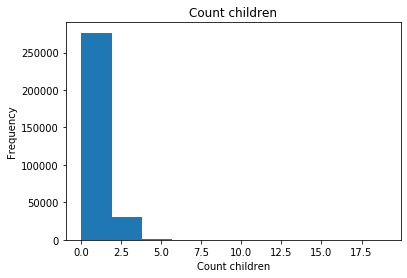

In [34]:
train_data['CNT_CHILDREN'].plot.hist(title = 'Count children');
plt.xlabel('Count children');

19 children seems a lot, but it is possible. 19 children is an outlier.

In [35]:
anom = train_data[train_data['CNT_CHILDREN'] >= 15]
non_anom = train_data[train_data['CNT_CHILDREN'] != 19]
print('The non anomalies default on %0.2f%% of counts' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of counts' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous children counts' % len(anom))

The non anomalies default on 8.07% of counts
The anomalies default on 0.00% of counts
There are 2 anomalous children counts


As shown here, there are 2 anomalities in count children. This is such a small amount of anomalous values that we decide not to change the data. more than 15 children seems unlikeley, but we are certain that it will not have a siginfican impact of our model.

Next we take a look at the days employed values. It seems likely to us that this is a feature that will impact the model we will get in the end.

In [36]:
train_data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Maxiumum value is almost a 1000 years. This is an impossible value, we have to look in to this. How many of those are outliers?

In [37]:
anom = train_data[train_data['DAYS_EMPLOYED'] == 365243]
non_anom = train_data[train_data['DAYS_EMPLOYED'] != 365243]
print('The non anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


There are 55374 anomalous values, we can change the values to NaN. We need to state if it are anomality or not. We add a column with a boolean value, indicating wether or not the value is anomalous.

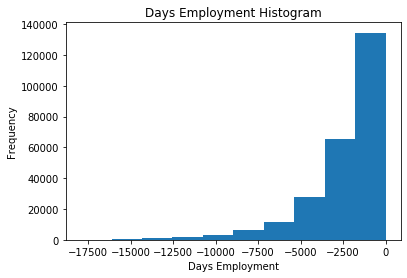

In [38]:
train_data['DAYS_EMPLOYED_ANOM'] = train_data["DAYS_EMPLOYED"] == 365243

#replaces the anomalities with nan
train_data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
#plot
train_data['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [39]:
test_data['DAYS_EMPLOYED_ANOM'] = test_data["DAYS_EMPLOYED"] == 365243

#replaces the anomalities with nan
test_data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (test_data['DAYS_EMPLOYED_ANOM'].sum(), len(test_data)))

There are 9274 anomalies in the test data out of 48744 entries


## Fill in missing values

##### We need to change the NaN's to median. And the bool-type to 0 and 1.

In [40]:
median_test = np.median(test_data['DAYS_EMPLOYED'])
median_train = np.median(train_data['DAYS_EMPLOYED'])

In [41]:
train_data['DAYS_EMPLOYED'].replace({np.nan: median_train}, inplace = True)
test_data['DAYS_EMPLOYED'].replace({np.nan: median_test}, inplace = True)

In [42]:
train_data['DAYS_EMPLOYED_ANOM'].replace({True: 1,False: 0}, inplace = True)
test_data['DAYS_EMPLOYED_ANOM'].replace({True: 1,False: 0}, inplace = True)

In [43]:
train_data.fillna(train_data.mean())

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,TARGET,DAYS_EMPLOYED_ANOM
0,100002,0,0,1,0,202500.000,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,0,0,0,0,1,0
1,100003,0,0,0,0,270000.000,1293502.5,35698.5,1129500.0,0.003541,...,0,0,0,0,0,0,0,0,0,0
2,100004,1,1,1,0,67500.000,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,1,0,135000.000,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,1,0,121500.000,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,0,0
5,100008,0,0,1,0,99000.000,490495.5,27517.5,454500.0,0.035792,...,0,0,0,0,0,0,0,0,0,0
6,100009,0,1,1,1,171000.000,1560726.0,41301.0,1395000.0,0.035792,...,0,0,0,0,0,0,0,0,0,0
7,100010,0,1,1,0,360000.000,1530000.0,42075.0,1530000.0,0.003122,...,0,0,0,0,0,0,0,0,0,0
8,100011,0,0,1,0,112500.000,1019610.0,33826.5,913500.0,0.018634,...,0,0,0,0,0,0,0,1,0,1
9,100012,1,0,1,0,135000.000,405000.0,20250.0,405000.0,0.019689,...,0,0,0,0,0,0,0,0,0,0


In [44]:
test_data.fillna(test_data.mean())

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,DAYS_EMPLOYED_ANOM
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,0,0,0,0,0,0,0,0,0,0
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,0,0,0,0,0,0,0,0,0,0
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,0,0,0,0,0,1,0,0,0,0
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,0,0,0,0,0,0,0,0,0,0
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,0,0,0,0,0,0,0,0,0,0
5,100042,0,1,1,0,270000.0,959688.0,34600.5,810000.0,0.025164,...,0,0,0,0,0,0,0,0,0,0
6,100057,0,1,1,2,180000.0,499221.0,22117.5,373500.0,0.022800,...,0,0,0,0,0,0,0,0,0,0
7,100065,0,0,1,0,166500.0,180000.0,14220.0,180000.0,0.005144,...,0,0,0,0,0,0,0,0,0,0
8,100066,0,0,1,0,315000.0,364896.0,28957.5,315000.0,0.046220,...,0,0,0,0,0,0,0,0,0,0
9,100067,0,1,1,1,162000.0,45000.0,5337.0,45000.0,0.018634,...,0,0,0,0,0,0,0,0,0,0


# Manage data from other csv files:


## Bureau balance

In [45]:

bureau_balance = pd.read_csv("home-credit-default-risk/bureau_balance.csv")
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [46]:
bureau_balance["STATUS"].unique()


array(['C', '0', 'X', '1', '2', '3', '5', '4'], dtype=object)

C - closed (repaid credit). X - unknown status. 0 - current loan, no delinquency. 1 - 1-30 days overdue, 2 - 31-60 days overdue, and so on up to status 5 - the loan is sold to a third party or written off

We can use this STATUS column and define a risk factor by allocating a value to each status and then calculate sum of them for each SK_ID_BUREAU

In [47]:
bureau_balance['STATUS'] = bureau_balance['STATUS'].map({'C' : 0 , '0' : 0 , 'X' : .1 , '1' : 1 , 
                                                      '2' : 2 , '3' : 3 , '4' :4 , '5' : 5})
# Allocate .1 for X because in this case the status is unknown and it's not reasonable to map a high risk to it

bureau_balance_final = bureau_balance.groupby('SK_ID_BUREAU', as_index=False)['STATUS'].sum()
bureau_balance_final = bureau_balance_final.rename(columns = {'STATUS' : 'BB_RISK'})
bureau_balance_final.head()

,SK_ID_BUREAU,BB_RISK
0,5001709,1.1
1,5001710,3.0
2,5001711,0.1
3,5001712,0.0
4,5001713,2.2


In [48]:
# check if there are any missing values
bureau_balance[bureau_balance.columns[bureau_balance.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Empty DataFrame

## Bureau

In [49]:
#load data
bureau = pd.read_csv("home-credit-default-risk/bureau.csv")
bureau= bureau.merge(bureau_balance_final, on = 'SK_ID_BUREAU', how = 'left')
bureau['BB_RISK'] = bureau['BB_RISK'].fillna(0) 
#handling categorical features
for col in list(bureau.columns) :
        if bureau[col].dtype == 'object' :
            bureau = pd.concat([bureau, pd.get_dummies(bureau[col], prefix=col)], axis=1)
            bureau = bureau.drop(columns = col)

bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,...,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,215354,5714462,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,215354,5714463,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,...,0,0,0,0,0,0,0,0,0,0
2,215354,5714464,-203,0,528.0,NaN,NaN,0,464323.5,NaN,...,0,0,0,0,0,0,0,0,0,0
3,215354,5714465,-203,0,NaN,NaN,NaN,0,90000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,215354,5714466,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,...,0,0,0,0,0,0,0,0,0,0


Now we get the mean of bureau table features for each SK_ID_CURR and also number of previous loans that each customer got before

In [50]:
bureau_mean = bureau.groupby('SK_ID_CURR').mean()
previous_loans = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count() #number of previous loans for each customer
previous_loans = previous_loans.rename(columns = {"SK_ID_CURR" : "SK_ID_CURR", "SK_ID_BUREAU" : "PLoan_num"})
bureau_mean= bureau_mean.merge(previous_loans, on = 'SK_ID_CURR', how = 'left')
bureau_mean = bureau_mean.drop(columns = "SK_ID_BUREAU" )
bureau_mean.head()

,SK_ID_CURR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,...,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,PLoan_num
0,100001,-735.000000,0.0,82.428571,-825.500000,NaN,0.0,207623.571429,85240.928571,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1,100002,-874.000000,0.0,-349.000000,-697.500000,1681.029,0.0,108131.945625,49156.200000,7997.14125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
2,100003,-1400.750000,0.0,-544.500000,-1097.333333,0.000,0.0,254350.125000,0.000000,202500.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,100004,-867.000000,0.0,-488.500000,-532.500000,0.000,0.0,94518.900000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,100005,-190.666667,0.0,439.333333,-123.000000,0.000,0.0,219042.000000,189469.500000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


Now we define a new variable from exisiting varaibles that may be useful and it is how often the cusomer took loans in past, was it on a regular basis or for a short period? Each can have different interpretation.

In [51]:
frequency = bureau[['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT']].groupby(by=['SK_ID_CURR'])
new_frequency =  frequency.apply(lambda x: x.sort_values(['DAYS_CREDIT'], ascending=False)).reset_index(drop=True)
new_frequency['Loan_FRQ'] = new_frequency.groupby(by=['SK_ID_CURR'])['DAYS_CREDIT'].diff()

Now need to find mean of Loan_FRQ for each SK_ID_CURR. First, I drop null values(beacause when we calculate diff, the diff value for the first bureau of each SK_ID_CURR is NAN ) and then calculate mean values for each SK_ID_CURR

In [53]:
new_frequency = new_frequency.dropna(subset = ['Loan_FRQ'])
new_frequency = new_frequency.groupby('SK_ID_CURR', as_index=False)['Loan_FRQ'].mean()


# Now we should merge new_frequency and bureau_mean database
bureau_mean= bureau_mean.merge(new_frequency, on = 'SK_ID_CURR', how = 'left')

#fill null values of this column (Loan_FRQ) with the value  of DAYS_CREDIT column. If this column has null value, it means that there was just 1 previous loan
bureau_mean["Loan_FRQ"] = np.where(bureau_mean["Loan_FRQ"].isnull(), bureau_mean['DAYS_CREDIT'], bureau_mean["Loan_FRQ"])
bureau_mean["Loan_FRQ"] = bureau_mean["Loan_FRQ"].abs()

bureau_mean.head(10)

,SK_ID_CURR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,...,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,PLoan_num,Loan_FRQ
0,100001,-735.000000,0.0,82.428571,-825.500000,NaN,0.0,207623.571429,85240.928571,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,253.833333
1,100002,-874.000000,0.0,-349.000000,-697.500000,1681.029,0.0,108131.945625,49156.200000,7997.14125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,190.571429
2,100003,-1400.750000,0.0,-544.500000,-1097.333333,0.000,0.0,254350.125000,0.000000,202500.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,660.000000
3,100004,-867.000000,0.0,-488.500000,-532.500000,0.000,0.0,94518.900000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,918.000000
4,100005,-190.666667,0.0,439.333333,-123.000000,0.000,0.0,219042.000000,189469.500000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,155.500000
5,100007,-1149.000000,0.0,-783.000000,-783.000000,0.000,0.0,146250.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1149.000000
6,100008,-757.333333,0.0,-391.333333,-909.000000,0.000,0.0,156148.500000,80019.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,509.500000
7,100009,-1271.500000,0.0,-794.937500,-1108.500000,0.000,0.0,266711.750000,76953.535714,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18,155.470588
8,100010,-1939.500000,0.0,-119.500000,-1138.000000,NaN,0.0,495000.000000,174003.750000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1603.000000
9,100011,-1773.000000,0.0,-1293.250000,-1463.250000,5073.615,0.0,108807.075000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,399.666667


In [54]:
# Now we fill null values with the value of median
imputer = SimpleImputer(strategy = "median")
imputer.fit(bureau_mean)
bureau_mean.loc[:] = imputer.transform(bureau_mean)

bureau_mean.columns = ['BUR_' + col for col in bureau_mean.columns]
bureau_mean = bureau_mean.rename(columns = {'BUR_SK_ID_CURR' : 'SK_ID_CURR'})

In [55]:
bureau_mean[bureau_mean.columns[bureau_mean.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305811 entries, 0 to 305810
Empty DataFrame

In [56]:

bureau_mean[bureau_mean.columns[bureau_mean.isnull().any()]] = bureau_mean[bureau_mean.columns[bureau_mean.isnull().any()]].fillna(0)

In [57]:
bureau_mean[bureau_mean.columns[bureau_mean.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305811 entries, 0 to 305810
Empty DataFrame

## Pos cash balance

In [58]:
#load data
pos_cash = pd.read_csv("home-credit-default-risk/POS_CASH_balance.csv")

#handling categorical features
for col in list(pos_cash.columns) :
        if pos_cash[col].dtype == 'object' :
            pos_cash = pd.concat([pos_cash, pd.get_dummies(pos_cash[col], prefix=col)], axis=1)
            pos_cash = pos_cash.drop(columns = col)
pos_count = pos_cash[[ 'SK_ID_PREV', 'SK_ID_CURR']].groupby(by = 'SK_ID_CURR').count()
pos_count = pos_count.rename(columns= {'SK_ID_CURR' : 'SK_ID_CURR', 'SK_ID_PREV' : 'prev_pos_count'})
pos_avg = pos_cash.groupby('SK_ID_CURR').mean()
pos_avg = pos_avg.merge(pos_count,  how='left', on='SK_ID_CURR')
pos_avg = pos_avg.drop('SK_ID_PREV', axis = 1)
pos_avg.head()

,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_XNA,prev_pos_count
SK_ID_CURR,,,,,,,,,,,,,,,
100001,-72.555556,4.000000,1.444444,0.777778,0.777778,0.777778,0.0,0.0,0.0,0.222222,0.0,0.0,0.000000,0.0,9
100002,-10.000000,24.000000,15.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,19
100003,-43.785714,10.107143,5.785714,0.000000,0.000000,0.928571,0.0,0.0,0.0,0.071429,0.0,0.0,0.000000,0.0,28
100004,-25.500000,3.750000,2.250000,0.000000,0.000000,0.750000,0.0,0.0,0.0,0.250000,0.0,0.0,0.000000,0.0,4
100005,-20.000000,11.700000,7.200000,0.000000,0.000000,0.818182,0.0,0.0,0.0,0.090909,0.0,0.0,0.090909,0.0,11


In [59]:
#changing column names to avoid any problem when we want to merge these tables with train and test
pos_avg.columns = ['POS_' + col for col in pos_avg.columns]
pos_avg = pos_avg.rename(columns = {'POS_SK_ID_CURR' : 'SK_ID_CURR'})

In [60]:
pos_avg[pos_avg.columns[pos_avg.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337252 entries, 100001 to 456255
Data columns (total 2 columns):
POS_CNT_INSTALMENT           337224 non-null float64
POS_CNT_INSTALMENT_FUTURE    337224 non-null float64
dtypes: float64(2)
memory usage: 7.7 MB


In [61]:
pos_avg[pos_avg.columns[pos_avg.isnull().any()]] = pos_avg[pos_avg.columns[pos_avg.isnull().any()]].fillna(0)

In [62]:
pos_avg[pos_avg.columns[pos_avg.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337252 entries, 100001 to 456255
Empty DataFrame

## Credit card balance

In [63]:
#load data
cc = pd.read_csv('home-credit-default-risk/credit_card_balance.csv')

# handling categorical features
for col in list(cc.columns) :
        if cc[col].dtype == 'object' :
            cc = pd.concat([cc, pd.get_dummies(cc[col], prefix=col)], axis=1)
            cc = cc.drop(columns = col)


# filling null values with median
imputer = SimpleImputer(strategy = "median")
imputer.fit(cc)
cc.loc[:] = imputer.transform(cc)

# Adding number of credit cards
cc_count = cc[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
cc_count = cc_count.rename(columns = {'SK_ID_CURR' : 'SK_ID_CURR' , 'SK_ID_PREV' : 'cc_count'})

# calculating the mean of each feature for each customer
cc_avg = cc.groupby('SK_ID_CURR').mean()
cc_avg  = cc_avg.merge(cc_count,  how='left', on='SK_ID_CURR')
cc_avg = cc_avg.drop('SK_ID_PREV', axis = 1)

#changing columns name
cc_avg.columns = ['ins_' + col for col in cc_avg.columns]
cc_avg = cc_avg.rename(columns = {'ins_SK_ID_CURR' : 'SK_ID_CURR'})

In [64]:
cc_avg[cc_avg.columns[cc_avg.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 103558 entries, 100006.0 to 456250.0
Empty DataFrame

## Previous application

In [65]:
#load data
pre_app = pd.read_csv('home-credit-default-risk/previous_application.csv')

#handling categorical features
for col in list(pre_app.columns) :
        if pre_app[col].dtype == 'object' :
            pre_app = pd.concat([pre_app, pd.get_dummies(pre_app[col], prefix=col)], axis=1)
            pre_app = pre_app.drop(columns = col)
            
# Adding number of credit cards
pre_count = pre_app[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
pre_count = pre_count.rename(columns = {'SK_ID_CURR' : 'SK_ID_CURR' , 'SK_ID_PREV' : 'pre_app_count'})

# calculating the mean of each feature for each customer
app_avg = pre_app.groupby('SK_ID_CURR').mean()
app_avg  = app_avg.merge(pre_count,  how='left', on='SK_ID_CURR')
app_avg = app_avg.drop('SK_ID_PREV', axis = 1)

imputer = SimpleImputer(strategy = "median")
imputer.fit(app_avg)
app_avg.loc[:] = imputer.transform(app_avg)

app_avg.columns = ['app_' + col for col in app_avg.columns]
app_avg = app_avg.rename(columns = {'app_SK_ID_CURR' : 'SK_ID_CURR'})

In [66]:

app_avg[app_avg.columns[app_avg.isnull().any()]] = app_avg[app_avg.columns[app_avg.isnull().any()]].fillna(0)

In [67]:
#check if dataset contains NaN values
app_avg[app_avg.columns[app_avg.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338857 entries, 100001 to 456255
Empty DataFrame

## Installment payments

In [68]:
ins_pay = pd.read_csv("home-credit-default-risk/installments_payments.csv")

for col in list(ins_pay.columns) :
        if ins_pay[col].dtype == 'object' :
            ins_pay = pd.concat([pre_app, pd.get_dummies(ins_pay[col], prefix=col)], axis=1)
            ins_pay = ins_pay.drop(columns = col)



ins_count = ins_pay[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
ins_count = ins_count.rename(columns = {'SK_ID_CURR' : 'SK_ID_CURR' , 'SK_ID_PREV' : 'ins_count'})
ins_avg = ins_pay.groupby('SK_ID_CURR').mean()
ins_avg  = ins_avg.merge(ins_count,  how='left', on='SK_ID_CURR')
ins_avg = ins_avg.drop('SK_ID_PREV', axis = 1)
# Percentage and difference paid in each installment (amount paid and installment value)
ins_avg['PAYMENT_PERC'] = ins_avg['AMT_PAYMENT'] / ins_avg['AMT_INSTALMENT']
ins_avg['PAYMENT_DIFF'] = ins_avg['AMT_INSTALMENT'] - ins_avg['AMT_PAYMENT']

# Days past due and days before due (no negative values)
ins_avg['DPD'] = ins_avg['DAYS_ENTRY_PAYMENT'] - ins_avg['DAYS_INSTALMENT']
ins_avg['DBD'] = ins_avg['DAYS_INSTALMENT'] - ins_avg['DAYS_ENTRY_PAYMENT']
ins_avg['DPD'] = ins_avg['DPD'].apply(lambda x: x if x > 0 else 0)
ins_avg['DBD'] = ins_avg['DBD'].apply(lambda x: x if x > 0 else 0)


In [69]:
#changing columns name
ins_avg.columns = ['ins_' + col for col in ins_avg.columns]
ins_avg = ins_avg.rename(columns = {'ins_SK_ID_CURR' : 'SK_ID_CURR'})

In [70]:
ins_avg[ins_avg.columns[ins_avg.isnull().any()]] = ins_avg[ins_avg.columns[ins_avg.isnull().any()]].fillna(0)

In [71]:
ins_avg[ins_avg.columns[ins_avg.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339587 entries, 100001 to 456255
Empty DataFrame

We should avoid float values too large

In [72]:
ins_avg.replace([np.inf, -np.inf], np.nan, inplace=True)

In [73]:
def merge_dataset(df1,df2,value):
    df2_cols = list(df2.columns)
    df1 = df1.merge(df2, how='left', on= value)
    df1[df2_cols] = df1[df2_cols].fillna(0)
    
    return df1

In [74]:
#merging train_data
train_data = merge_dataset(train_data, bureau_mean,  'SK_ID_CURR')
train_data = merge_dataset(train_data, pos_avg ,  'SK_ID_CURR')
train_data = merge_dataset(train_data, cc_avg ,  'SK_ID_CURR')
train_data = merge_dataset(train_data, app_avg ,  'SK_ID_CURR')
train_data = merge_dataset(train_data, ins_avg ,  'SK_ID_CURR')


#merging test_data
test_data = merge_dataset(test_data, bureau_mean,  'SK_ID_CURR' )
test_data = merge_dataset(test_data, pos_avg ,  'SK_ID_CURR' )
test_data = merge_dataset(test_data, cc_avg ,  'SK_ID_CURR' )
test_data = merge_dataset(test_data, app_avg ,  'SK_ID_CURR' )
test_data = merge_dataset(test_data, ins_avg,  'SK_ID_CURR' )

# Polynomial Features

In [75]:
train_data['EXT_SOURCE_1'] = ext1train_data
test_data['EXT_SOURCE_1'] = ext1test_data

Making the three least correlated features and the most correlated feature towards target a new dataframe. We impute the data to assure that every value converts to the median. We will construct polynomial features. these features will capture the interaction between variables. This is done so that we will not miss any data that may have av bigger impact on the target than we think. Because while two variables may no have a strong effect on the target value, combining them will prehaps show a more correlating factor on the target value.

In [76]:
# Make a new dataframe for polynomial features
poly_features = train_data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = test_data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [77]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


Here we have created a total of 35 polynomial features, now we will look at how the correlation between these new features is on the target value.

In [78]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


Here we can see that some of the correlations are greater than ones we had before. This means that these are important factors to consider when training our model and we will append these values to our original tabel, both test and train. Note for future developing of the data is to prehaps look at more polynomial variables to see if there are more combinations of variables that has similar levels of correlation.

In [79]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = train_data['SK_ID_CURR']
train_poly = train_data.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = test_data['SK_ID_CURR']
test_poly = test_data.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
train_poly, test_poly = train_poly.align(test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', train_poly.shape)
print('Testing data with polynomial features shape:  ', test_poly.shape)

Training data with polynomial features shape:  (307511, 470)
Testing data with polynomial features shape:   (48744, 470)


In [80]:
train_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,ins_DAYS_INSTALMENT,ins_DAYS_ENTRY_PAYMENT,ins_AMT_INSTALMENT,ins_AMT_PAYMENT,ins_ins_count,ins_PAYMENT_PERC,ins_PAYMENT_DIFF,ins_DPD,ins_DBD,EXT_SOURCE_1
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,-295.000000,-315.421053,11559.247105,11559.247105,19.0,1.000000,0.000000,0.0,20.421053,0.083037
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,-1378.160000,-1385.320000,64754.586000,64754.586000,25.0,1.000000,0.000000,0.0,7.160000,0.311267
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,-754.000000,-761.666667,7096.155000,7096.155000,3.0,1.000000,0.000000,0.0,7.666667,NaN
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,-252.250000,-271.625000,62947.088438,62947.088438,16.0,1.000000,0.000000,0.0,19.375000,NaN
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,-1028.606061,-1032.242424,12666.444545,12214.060227,66.0,0.964285,452.384318,0.0,3.636364,NaN


In [81]:
test_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,ins_DAYS_INSTALMENT,ins_DAYS_ENTRY_PAYMENT,ins_AMT_INSTALMENT,ins_AMT_PAYMENT,ins_ins_count,ins_PAYMENT_PERC,ins_PAYMENT_DIFF,ins_DPD,ins_DBD,EXT_SOURCE_1
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,-2187.714286,-2195.000000,5885.132143,5885.132143,7.0,1.000000,0.000000,0.0,7.285714,0.752614
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,-586.000000,-609.555556,6240.205000,6240.205000,9.0,1.000000,0.000000,0.0,23.555556,0.564990
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,-1352.929032,-1358.109677,10897.898516,9740.235774,155.0,0.893772,1157.662742,0.0,5.180645,NaN
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,-855.548673,-858.548673,4979.282257,4356.731549,113.0,0.874972,622.550708,0.0,3.000000,0.525734
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,-622.000000,-634.250000,11100.337500,11100.337500,12.0,1.000000,0.000000,0.0,12.250000,0.202145


# Short-List Promising Models

Using "minmax scaler" to to get a beetter scale of the data we are looking at. A scaler is something that fits all the data to a simliar scale, so that the data whit a great magnitude does not affect the machine learning too much. Bringing all features to the same level of magnitude is important for the model because then the features will weigh in equally when training the model. The machine learning will then find out after the training is done what features where most important and not be influenced by the sheer magnitude of the euclidian distance of each feature. Euclidian distance is just the distance in value between samples of data.

In [82]:
# Drop the target from the training data
if 'TARGET' in train_data:
    train = train_data.drop(columns = ['TARGET'])
else:
    train = train_data.copy()
    
# Feature names
features = list(train.columns)

test = test_data.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test_data)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 435)
Testing data shape:  (48744, 435)



Now we split the data into a test and train set, where y_train includes all the target values of the training model and X_train icludes all the features of the training set. X_test is all the values of test except for the target value, which is the "answer" to the problem, and y_test is all the 'TARGET' value of our local test set. Not to be confused with the test set which we do not have the 'TARGET' value.

In [83]:
y = train_data['TARGET']
#X = train_data.drop(['TARGET'], axis=1)
#X, y = np.arange(10).reshape((5, 2)), range(5)
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=42)

## Light gbm

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

* Faster training speed and higher efficiency.
* Lower memory usage.
* Better accuracy.
* Support of parallel and GPU learning.
* Capable of handling large-scale data.

In [84]:

# lgbm format
train = lgb.Dataset(X_train, label = y_train)

# lgbm. parameters
params = {'boosting_type': 'gbdt',
          'max_depth' : 5,
          'objective': 'binary',
          'nthread': 5,
          'num_leaves': 32,
          'learning_rate': 0.05,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 0.7,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 20,
          'reg_lambda': 20,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 10,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'auc'
          }
lgbm = lgb.train(params,
                 train,
                 2500,
                 verbose_eval= 10
                 )

In [85]:
lgbm_pred = lgbm.predict(test)

In [86]:
# Submission dataframe
submit = test_data[['SK_ID_CURR']]
submit['TARGET'] = lgbm_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.050457
1,100005,0.123401
2,100013,0.028481
3,100028,0.034025
4,100038,0.075072


# Create csv file

In [87]:
# Submission lgbm in csv file
submit.to_csv('final_result.csv', index = False)